<a href="https://colab.research.google.com/github/Marcozambeli/Control-Theory-II---UFJF/blob/master/Exercicio7.3ogata(bode).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercicio 7.3 Ogata

     |████████████████████████████████| 256kB 2.9MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=2c655c3c43ae46c1f470cbc0430abdecf91b2bae46cf24dc39d3395ade33f6f8
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


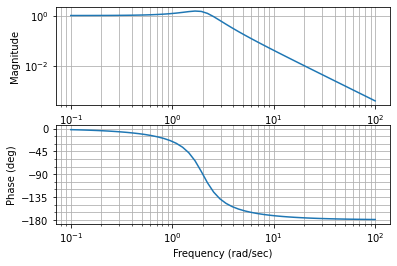

In [1]:
!pip install control
import numpy as np
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from control import *

wn = 2
qsi = 0.3535

w_baixo = np.logspace(-3,0,6)
w_alto = np.logspace(0,3,6)
w = np.concatenate( (w_baixo, w_alto) )

# Calcula Aproximacao Assintotica para Modulo de G(jw)

gjw_baixo = np.zeros(6, dtype=float)
gjw_alto = -40*np.log10(w_alto/wn)
gjw = np.concatenate( (gjw_baixo, gjw_alto) )

# Calcula Curva Real (utilizando a biblioteca control)

num = [ wn**2]
den = [ 1, 2*qsi*wn, wn**2]
gs=tf(num,den)
gjw_real = bode(gs)
mag = gjw_real[0]
magdB = 20*np.log10(mag)
fase = gjw_real[1]*180/np.pi
w_novo = gjw_real[2]

figura = make_subplots(specs=[[{"secondary_y": True}]])

figura.add_trace(go.Scatter(y=gjw,x=w,name="Aproximacao Assintotica"),secondary_y=False)
figura.add_trace(go.Scatter(y=magdB,x=w_novo,name="Curva Real"),secondary_y=False)

figura.update_xaxes(type="log")

figura.update_layout(
    title="Diagrama de Bode",
    xaxis_title="Freqüência em rad/s",
    yaxis_title="Módulo de $G(j \omega)$ em dB"
)

# Calcula Ângulo

figura.add_trace(go.Scatter(x=w_novo, y=fase, name="Angulo de G(jw)"),secondary_y=True)

figura.update_yaxes(title="Ângulo de G(jw)", secondary_y=True)
figura.show()